In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv("C:/Users/user/Downloads/archive/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.shape

(299, 13)

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
df.DEATH_EVENT.count()

299

In [20]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

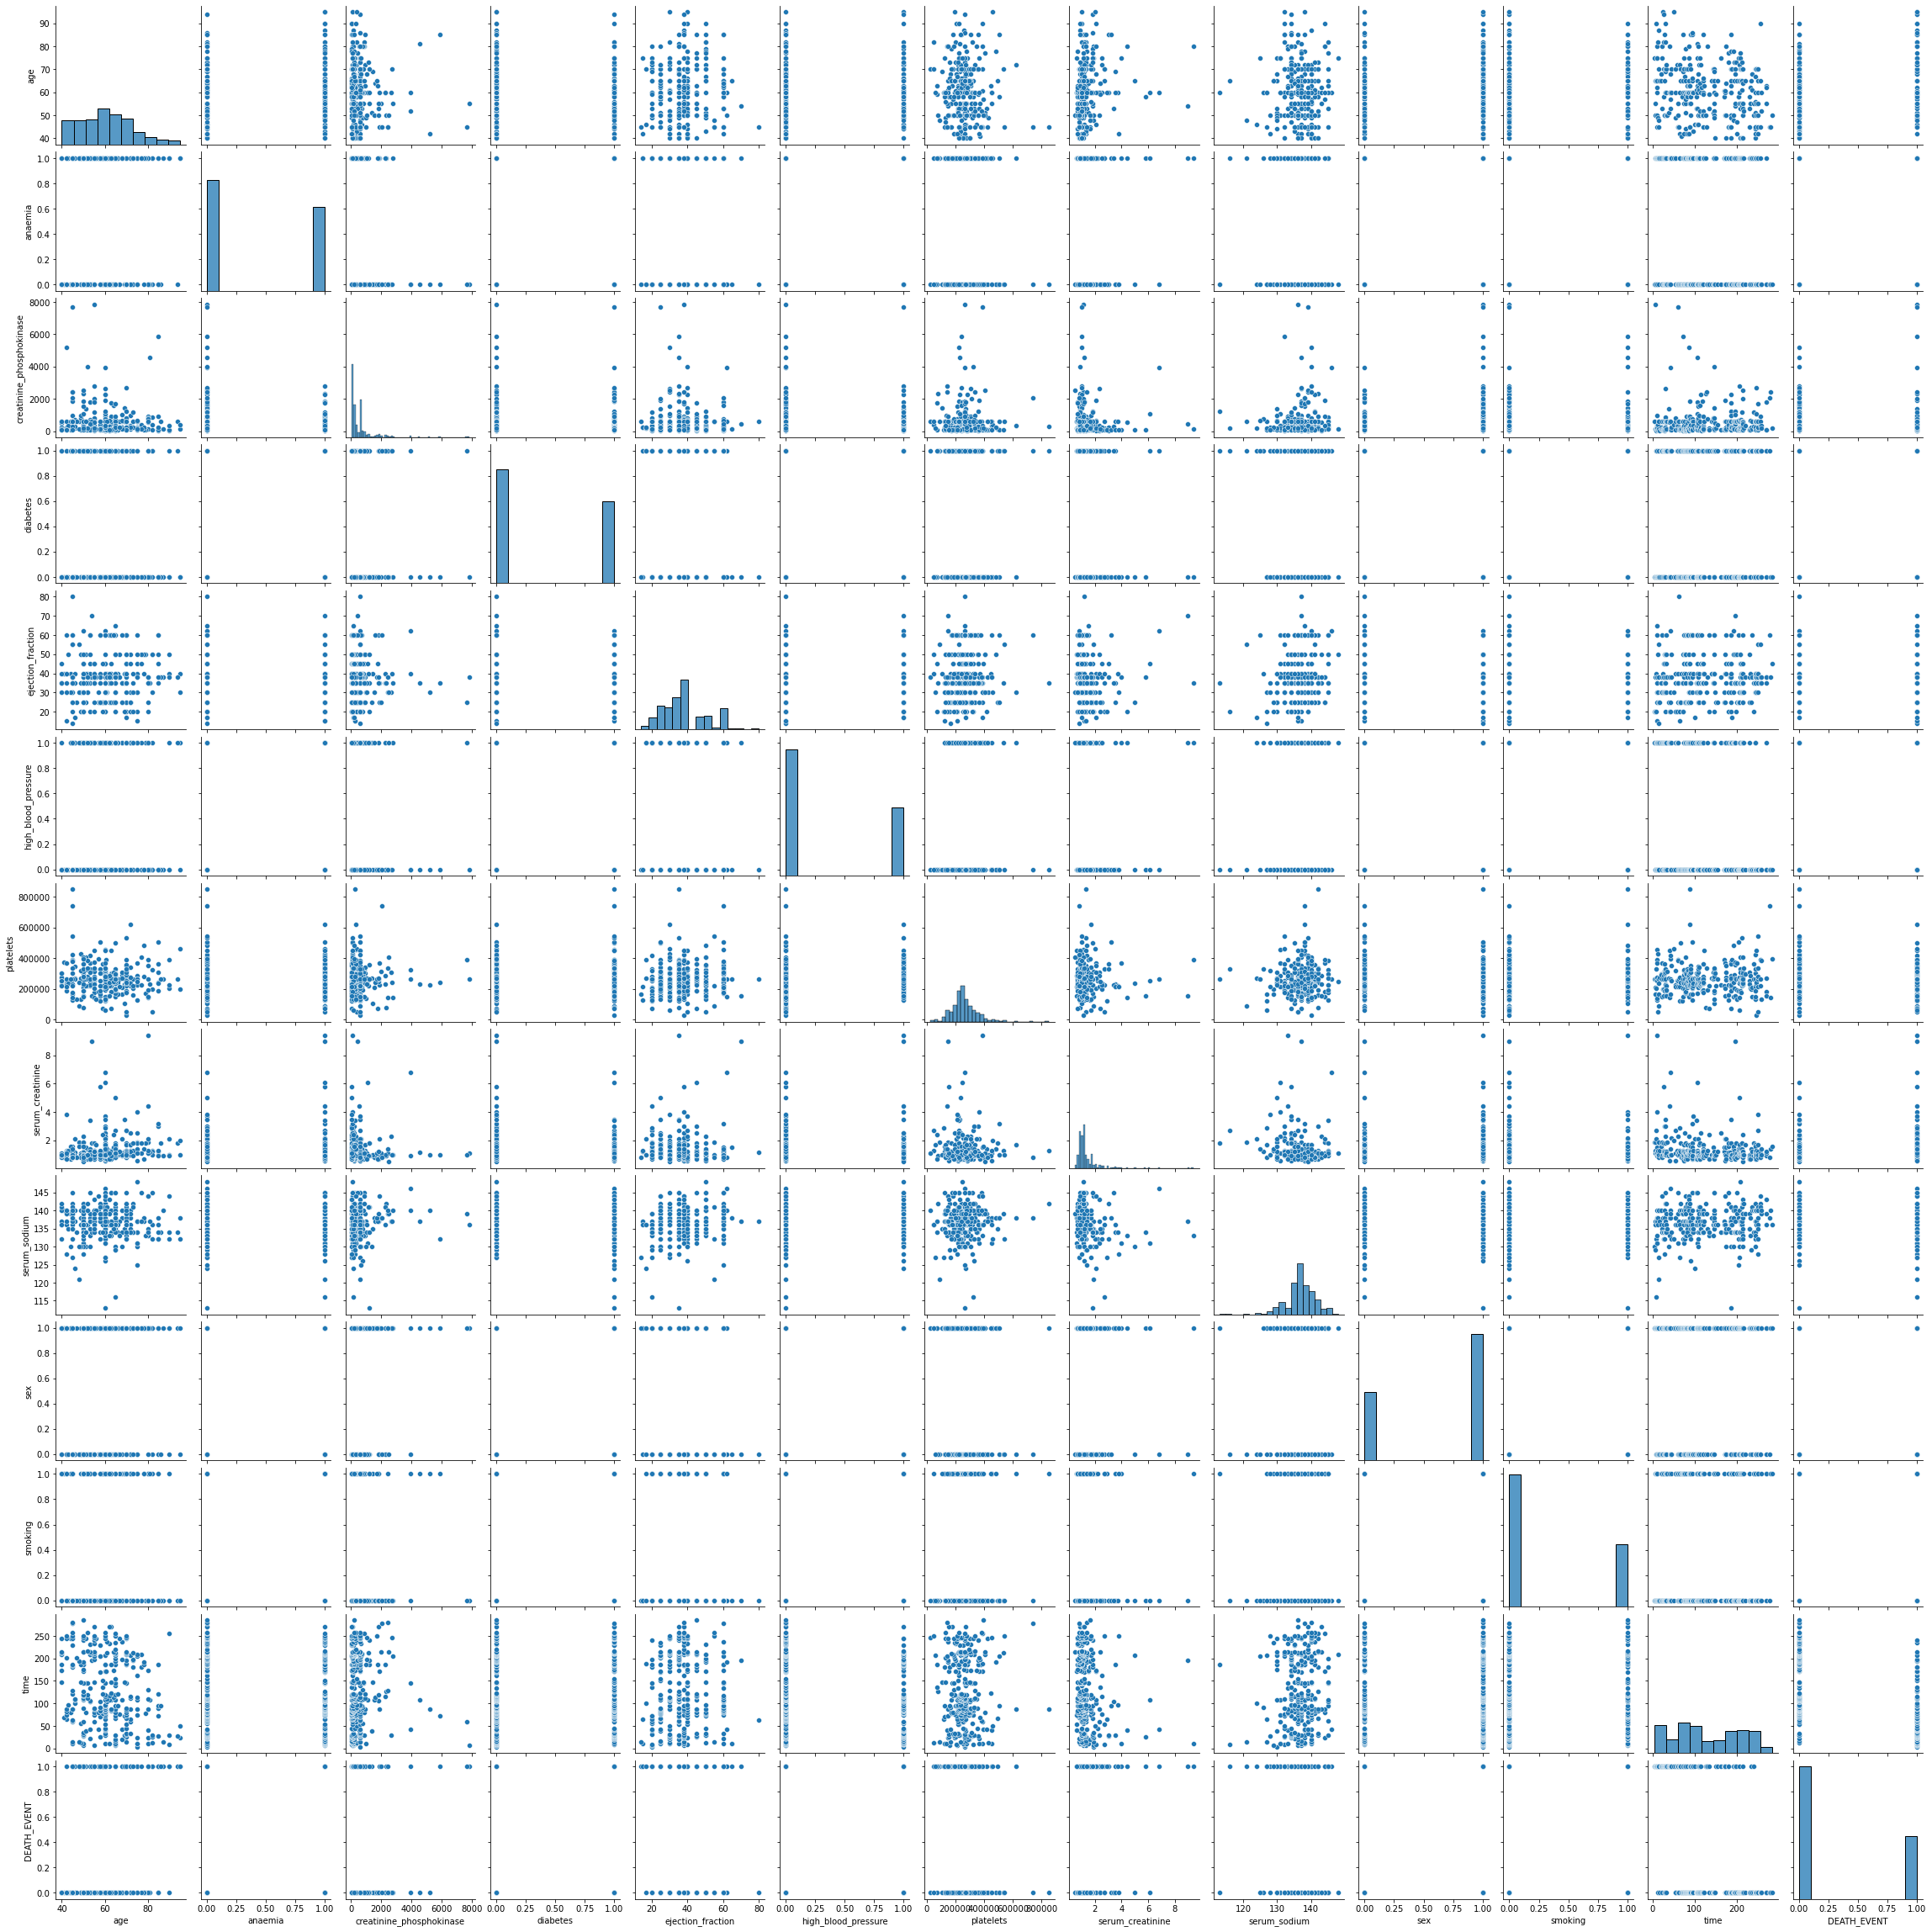

In [54]:
sns.pairplot(df)

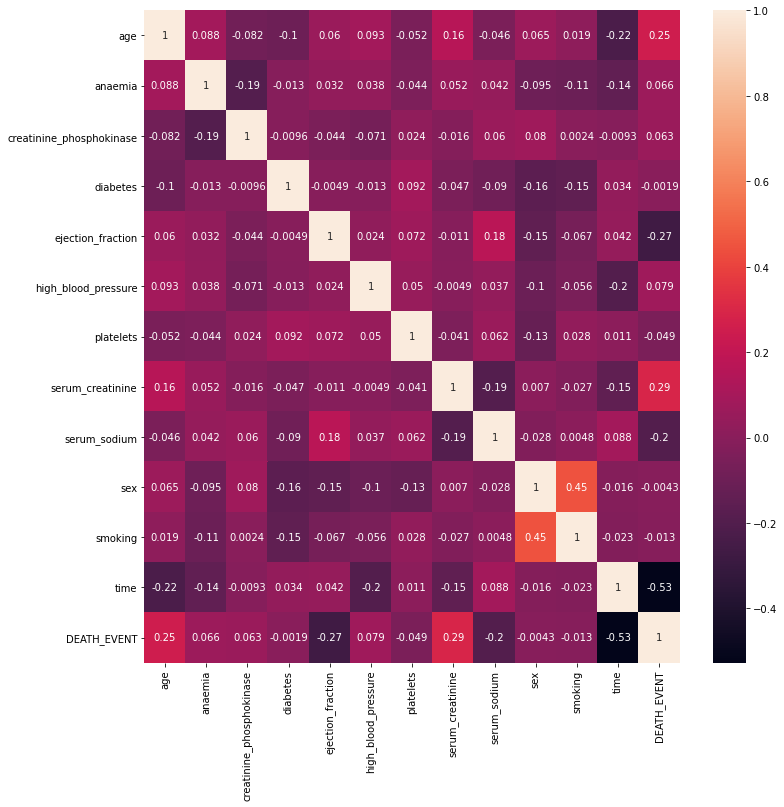

In [57]:
corr_matrix = df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

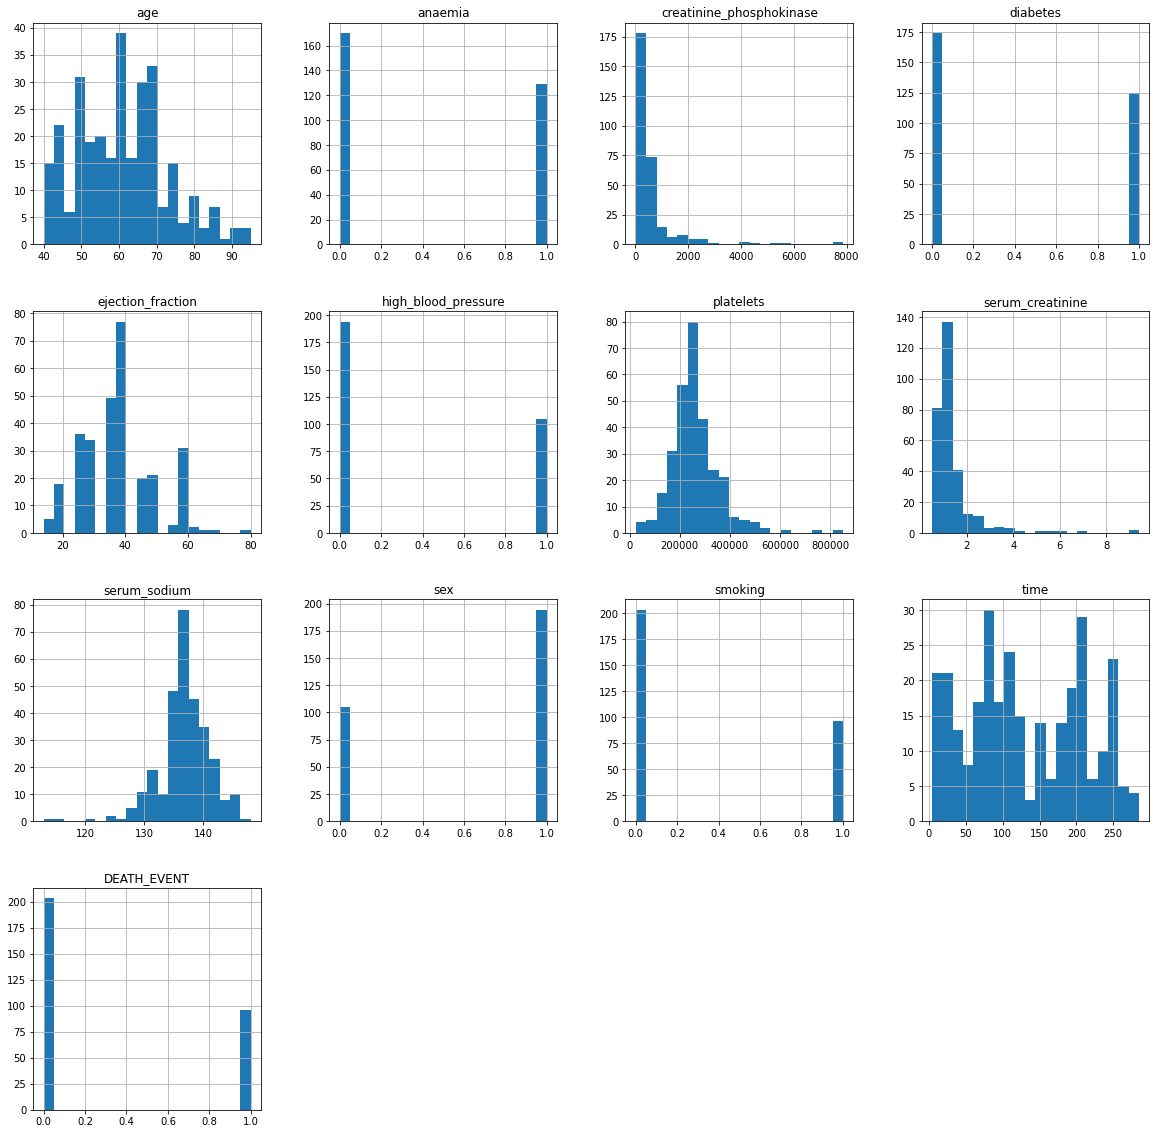

In [55]:
df.hist(bins = 20, figsize = (20, 20))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

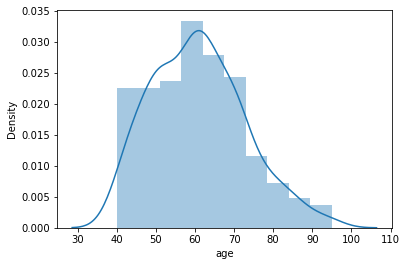

In [5]:
sns.distplot(df.age)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

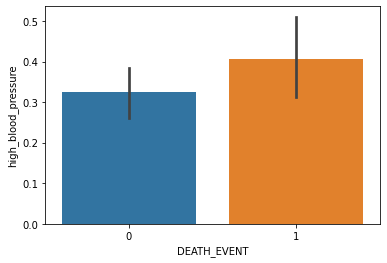

In [24]:
sns.barplot(x='DEATH_EVENT',y='high_blood_pressure',data=df)

In [9]:
x= df.drop(['DEATH_EVENT'],axis=1)
y=df.DEATH_EVENT

In [11]:
x.shape

(299, 12)

In [12]:
y.shape

(299,)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=45)

In [47]:
x_train.shape

(149, 12)

In [48]:
y_train.shape

(149,)

In [49]:
x_test.shape

(150, 12)

In [50]:
y_test.shape

(150,)

In [53]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(y_pred)

[ 0.5927946   0.45183492  1.29906344  0.27894929  0.60639617  0.4267595
  0.58692896  0.17545919  0.1019826   0.34086347  0.34073768  0.41848615
  0.04780117  0.82017732 -0.31271253  0.68268072  0.93347585  0.01033629
 -0.12094785  0.50432511  0.23554807  0.43694403  0.74564333 -0.08417152
  0.36884599  0.56286191 -0.03167815  0.51284033  0.563174    0.42795543
  0.27492284  0.52806327  0.40346505  0.65004552  0.12475402  0.73365919
  0.46048907  0.09285789  0.29730746  0.0392706   0.14054811  0.38534599
  0.3028542   0.60229136  0.01739592 -0.03834837  0.24076068  0.25709118
 -0.12264243  0.24577518  0.37032362 -0.04177523  0.08823867  0.26010217
  0.5856069   0.55653321  0.04163771 -0.00339941  0.73506184  0.47317686
  0.32788943  0.30135127  0.57224818 -0.15956797  0.21708929  0.30811214
  0.22768528 -0.12827545 -0.22412512  0.29435009  0.53799226  0.41816341
 -0.05047344  0.39629635  0.90971604  0.13515134  0.39642734  0.60417869
  0.30008792  0.59542907  0.2785279   0.32508876  0.

In [51]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 6.34657389e-03  1.29342752e-03  7.08223759e-06  4.99432840e-02
 -9.52471756e-03 -5.31981801e-02 -1.86686930e-07  7.71310207e-02
 -1.18237887e-02 -1.22377609e-01  3.46678912e-02 -2.60843513e-03]
Mean squared error: 0.13
Coefficient of determination: 0.37
